In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [351]:
data= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

pd.set_option('display.max_column',None)
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [352]:
#data.info()

In [353]:
#data.isnull().sum()

In [354]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: xlabel='Churn'>

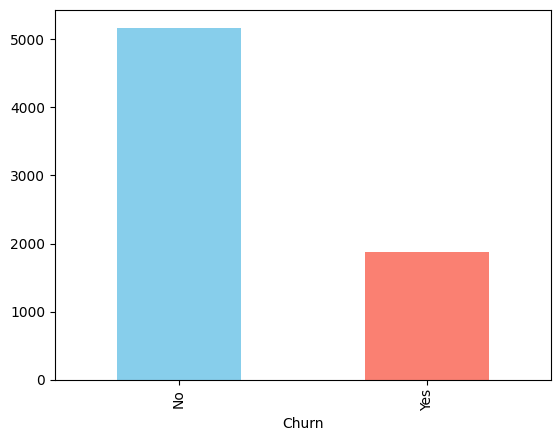

In [355]:
data["Churn"].value_counts().plot(kind="bar",color=["skyblue","salmon"])

In [356]:
data["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [357]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [358]:
data.drop(columns=["customerID"],inplace=True)


In [359]:
data["Churn"]=data["Churn"].map({"No":0,"Yes":1})

In [360]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0


In [361]:
data["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [362]:
data["OnlineSecurity"].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [363]:
data["StreamingMovies"].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [364]:
data["StreamingTV"].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [365]:
data["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [366]:
data["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [367]:
data["TotalCharges"]= pd.to_numeric(data["TotalCharges"],errors="coerce")

In [368]:
data["TotalCharges"]= data["TotalCharges"].fillna(data["TotalCharges"].median())

In [369]:
data["PhoneService"].value_counts()


PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [370]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [371]:
data["gender"]= data["gender"].apply(lambda x :0 if x=="Male" else 1)

In [372]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [373]:
data["Partner"]= data["Partner"].apply(lambda x :0 if x=="No" else 1)

In [374]:
data["Dependents"]= data["Dependents"].apply(lambda x :0 if x=="No" else 1)

In [375]:
data["PhoneService"]= data["PhoneService"].apply(lambda x :0 if x=="No" else 1)

In [376]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [377]:
cat_col= [col for col in data.columns if data.dtypes[col] =="object"]
num_col= [col for col in data.columns if data.dtypes[col]!="object"]

In [378]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder(sparse_output=False,drop="first")
column=data[cat_col]
encoded_col= oh.fit_transform(column)
encoded_df= pd.DataFrame(encoded_col, columns=oh.get_feature_names_out(cat_col),index=data.index)
df= pd.concat([data,encoded_df],axis=1)
#df.drop(columns=[cat_col],inplace=True)

In [379]:
df.drop(columns=["MultipleLines",
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'],inplace=True)

In [380]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,29.85,29.85,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,0,0,0,34,1,56.95,1889.50,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [381]:
df.shape

(7043, 31)

In [382]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train distribution:\n", y_train.value_counts())
print("Test distribution:\n", y_test.value_counts())


Train distribution:
 Churn
0    4139
1    1495
Name: count, dtype: int64
Test distribution:
 Churn
0    1035
1     374
Name: count, dtype: int64


In [383]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [384]:
scale_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = StandardScaler()
X_train_smote[scale_cols] = scaler.fit_transform(X_train_smote[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])


In [385]:
model = LogisticRegression(
    random_state=42,
    max_iter=1000
)

model.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=1000, random_state=42)

In [386]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7416607523066004

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1035
           1       0.51      0.71      0.59       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409


Confusion Matrix:
 [[778 257]
 [107 267]]


In [387]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred_custom = (y_prob >= 0.4).astype(int)


In [388]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)


ROC-AUC: 0.8158593608721486


In [389]:
importance = pd.Series(
    model.coef_[0],
    index=X_train.columns
).sort_values()

print(importance.head(10))   # reduces churn
print(importance.tail(10))   # increases churn


PhoneService                     -4.737951
MultipleLines_No phone service   -4.350322
Contract_Two year                -1.387358
tenure                           -1.383816
Dependents                       -0.917332
Contract_One year                -0.736243
SeniorCitizen                    -0.663865
gender                           -0.545218
TechSupport_Yes                  -0.446612
Partner                          -0.381647
dtype: float64
DeviceProtection_Yes                    -0.127863
PaymentMethod_Mailed check               0.011584
PaymentMethod_Credit card (automatic)    0.013728
StreamingTV_Yes                          0.297667
StreamingMovies_Yes                      0.350014
MultipleLines_Yes                        0.356328
PaperlessBilling_Yes                     0.433761
PaymentMethod_Electronic check           0.453607
TotalCharges                             0.828858
InternetService_Fiber optic              1.120475
dtype: float64


In [390]:
 y_prob = model.predict_proba(X_test)[:, 1]

for t in [0.3, 0.35, 0.4, 0.45]:
    y_pred_t = (y_prob >= t).astype(int)
    print("\nThreshold:", t)
    print(classification_report(y_test, y_pred_t))



Threshold: 0.3
              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1035
           1       0.44      0.88      0.59       374

    accuracy                           0.67      1409
   macro avg       0.69      0.74      0.66      1409
weighted avg       0.80      0.67      0.69      1409


Threshold: 0.35
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1035
           1       0.45      0.82      0.58       374

    accuracy                           0.69      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.79      0.69      0.70      1409


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1035
           1       0.47      0.80      0.59       374

    accuracy                           0.71      1409
   macro avg       0.69      0.74      0.68      1409
weighted avg       0.79  

ROC-AUC: 0.8158593608721486


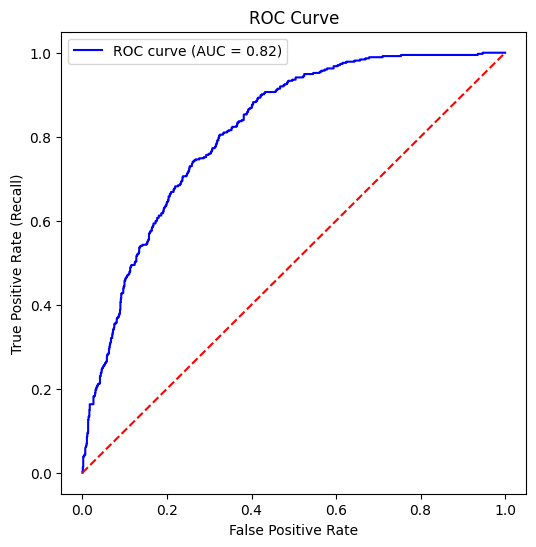

In [391]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_prob = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()
